# Two-Dimensional Random Walk Animation

Here is an animation of a 2D random walk, created with Python `matplotlib.animation`.

In [ ]:
# import the necessary modules
import numpy
import random
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

The following code draws the frames of the animation.

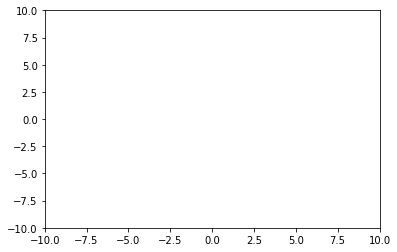

In [ ]:
# define some plot variables
fig, ax = plt.subplots()
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

# define the possible moves at each step of the random walk
dirs = numpy.array([[0,1],[0,-1],[1,0],[-1,0]])

# define a numpy array to hold the locations visited on the random walk
locations = numpy.zeros((1,2)) # 1 row, 2 columns

# define a function to make animation frames
def run(i):
  global locations
  
  # first frame is handled separately
  if i == 0:
    line, = ax.plot([], [], lw=2)
    ax.plot(0,0,'ro')
    return line
  
  # generate a step of the random walk
  r = random.randrange(4)
  move = dirs[r]
  nextloc = [locations[-1] + move]
  locations = numpy.append(locations, nextloc, axis=0)
  
  # set the plot data
  xdata = locations[:,0]
  ydata = locations[:,1]
  
  ax.cla() # clear the previous plot (necessary for removing old dots)
  
  # update the plot limits
  ax.set_xlim(min(-10,min(xdata)-1), max(10,max(xdata)+1))
  ax.set_ylim(min(-10,min(ydata)-1), max(10,max(ydata)+1))
  
  # redraw the plot
  line, = ax.plot([], [], lw=2)
  line.set_data(xdata, ydata)
  ax.plot(locations[-1,0], locations[-1,1], 'ro')
  
  return line

The next line of code produces the animation object.

In [ ]:
anim = animation.FuncAnimation(fig, run, frames=400, interval=100)

One way to view the animation is by converting it to an HTML5 video:

In [ ]:
HTML(anim.to_html5_video())

Another way to view the animation is to create an interactive JavaScript object, which provides more controls than the HTML5 video.

In [ ]:
HTML(anim.to_jshtml())